In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
sr = 44.1*10e2

In [2]:
rootDir = '../touchDesigner/data/generated/'
allIRs = os.listdir(rootDir)
allIRs

['ir_rir441_2.npy',
 'ir_scene3_RIR_LS1_MP1_0.npy',
 'ir_rir441_1.npy',
 'ir_scene1_RIR_Diffuse_LS1_MP1_0.npy',
 'ir_scene1_RIR_Absorbing_LS1_MP1_0.npy',
 'ir_scene2_RIR_1mPlate_rigid_LS1_MP1_0.npy',
 'ir_scene2_RIR_1mPlate_rigid_LS4_MP5_0.npy',
 'ir_scene1_RIR_Rigid_LS1_MP1_0.npy',
 'ir_scene3_RIR_LS1_MP1_2.npy',
 'ir_rir441_3.npy',
 'ir_rir441_0.npy']

In [49]:
origData = ['../touchDesigner/data/scenes/03 multiple reflection (parallel finite plates)/RIRs/wav/scene3_RIR_LS1_MP1.wav',
'../touchDesigner/data/scenes/01 single reflection (infinite plate)/RIRs/wav/scene1_RIR_Diffuse_LS1_MP1.wav',
'../touchDesigner/data/scenes/01 single reflection (infinite plate)/RIRs/wav/scene1_RIR_Absorbing_LS1_MP1.wav',
'../touchDesigner/data/scenes/02 single reflection (finite plate)/RIRs/wav/scene2_RIR_1mPlate_rigid_LS1_MP1.wav',
'../touchDesigner/data/scenes/02 single reflection (finite plate)/RIRs/wav/scene2_RIR_1mPlate_absorbing_LS4_MP5.wav',
'../touchDesigner/data/scenes/01 single reflection (infinite plate)/RIRs/wav/scene1_RIR_Rigid_LS1_MP1.wav']

In [42]:
from scipy.io import wavfile 

In [46]:
sr,orig = wavfile.read(origData[0])

/home/patrik/miniconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


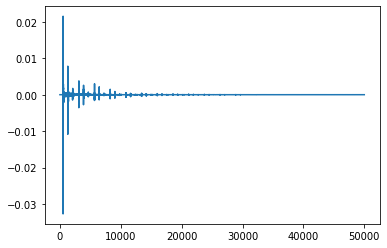

In [47]:
plt.plot(orig)

/home/patrik/miniconda3/lib/python3.7/site-packages/tikzplotlib/_legend.py:105: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  x0_legend, x1_legend = obj._legend_box.get_window_extent(renderer).get_points()


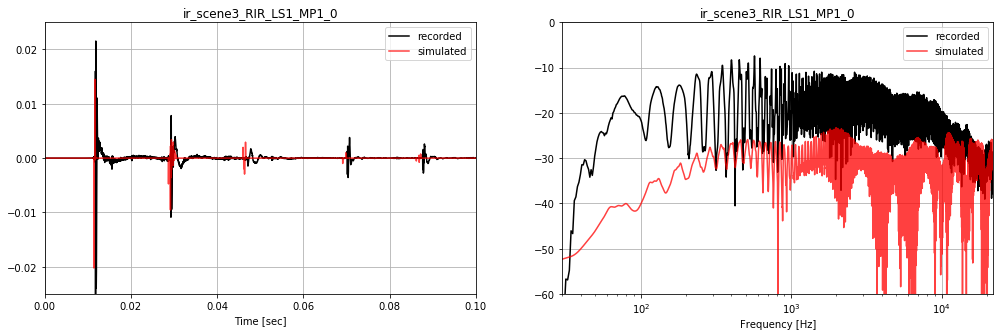

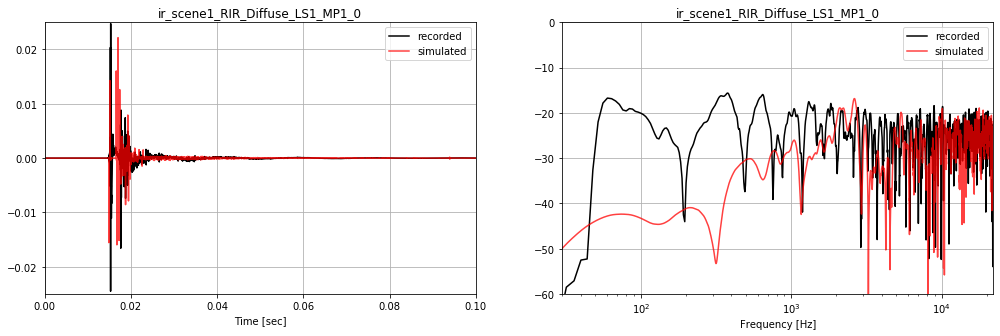

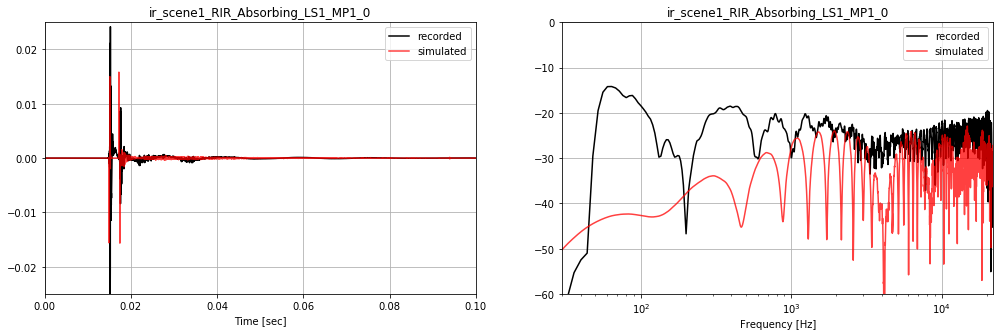

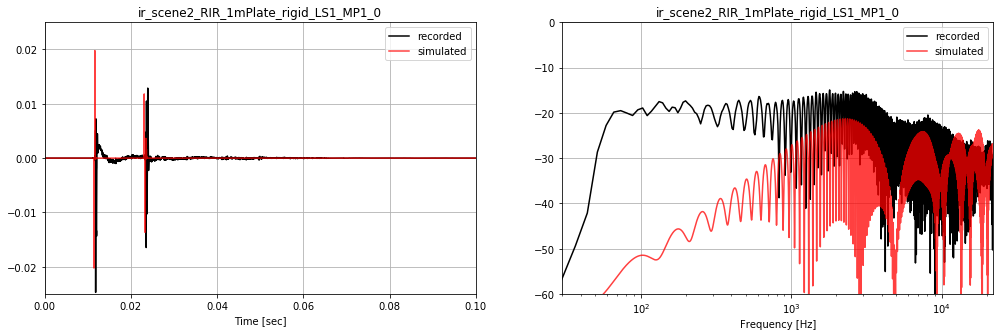

/home/patrik/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


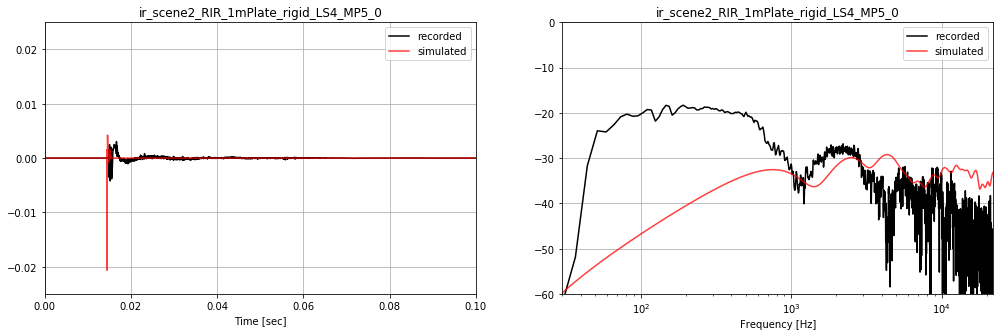

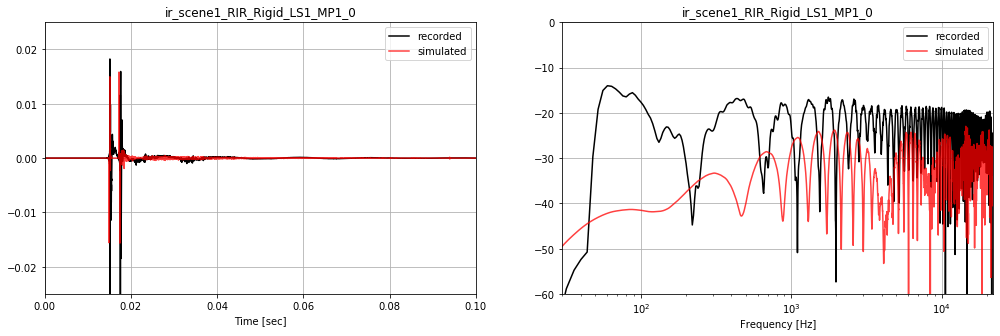

In [66]:
for n,irFile in enumerate(allIRs):
    srl,orig = wavfile.read(origData[n])
    if srl != sr:
        raise TypeError('comparing files with different sampling rates')
    
    fullPath = os.path.join(rootDir,irFile)
    fName = irFile[:-4]
    ir = np.load(fullPath)
    N = len(ir)
    T = N/sr
    n = np.arange(N)
    t = n/sr
    
    plt.figure(figsize=[17,5])
    
    plt.subplot(121)

    
    No = len(orig)
    To = No/sr
    no = np.arange(No)
    to = no/sr
    plt.plot(to,orig, 'k', label="recorded")
    
    plt.plot(t,ir, 'r', label="simulated", alpha=0.75)
    
    plt.xlim([0,0.1])
    yrang = 0.025
    plt.ylim([-yrang,yrang])
    plt.xlabel("Time [sec]")
    plt.title(fName)
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
 
    spec = abs(np.fft.fft(orig))
    specLen = len(spec)
    magSpec = 20*np.log10(spec[:int(specLen/2)])
    fax = np.linspace(0,sr/2, int(specLen/2))
    plt.plot(fax,magSpec, 'k', label='recorded')
    
    spec = abs(np.fft.fft(ir))
    specLen = len(spec)
    magSpec = 20*np.log10(spec[:int(specLen/2)])
    fax = np.linspace(10,sr/2, int(specLen/2))
    plt.xlim([30, sr/2])
    plt.ylim([-60,0])
    plt.semilogx(fax,magSpec, 'r', alpha=0.75, label='simulated')

    plt.xlabel("Frequency [Hz]")
    plt.title(fName)
    plt.legend(loc='upper right')
    
    plt.grid()
#     tikzplotlib.clean_figure()
    tikzplotlib.save("../../paper/DAFx20_Templates_LaTeX/img/"+fName+".tex", float_format='.4f')
    plt.show()

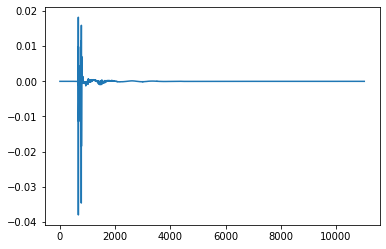

In [51]:
plt.plot(orig)